### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print('m',m,'\n')
print('column mean',np.mean(m,axis=0),'\n')
print('row mean',np.mean(m,axis=1),'\n')
print('m mean',np.mean(m))


('m', array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]]), '\n')
('column mean', array([ 4.,  5.,  6.,  7.]), '\n')
('row mean', array([ 1.5,  5.5,  9.5]), '\n')
('m mean', 5.5)


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
Produit=np.outer(u,v)
print(Produit,'\n')

L=np.zeros((len(u),len(v)))
for i in range(4):
    L[:,i]=u*v[i]
    
print(L)



(array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]]), '\n')
[[  2.   4.   6.   8.]
 [  6.  12.  18.  24.]
 [ 10.  20.  30.  40.]
 [ 14.  28.  42.  56.]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
import numpy.random as npr
M=npr.random((10,6))
print(M)

mask=np.any(M<0.1, axis=1)
print(mask)
M[mask]=0
print(M)






[[ 0.65759322  0.92201533  0.18319309  0.57491968  0.08321267  0.98533574]
 [ 0.98781534  0.60901407  0.90787452  0.085397    0.83870217  0.26466704]
 [ 0.54844391  0.34315928  0.80116896  0.36831483  0.06037814  0.28553687]
 [ 0.23750618  0.85667738  0.71049215  0.73626933  0.66745709  0.63316935]
 [ 0.02021065  0.53638392  0.04784506  0.06110602  0.90809059  0.11371868]
 [ 0.02038587  0.83633419  0.78576555  0.26250167  0.93653557  0.66965996]
 [ 0.52979704  0.70230611  0.52424279  0.35106605  0.30645688  0.2357649 ]
 [ 0.68740935  0.75730057  0.11046532  0.75359604  0.37134809  0.58474493]
 [ 0.9383169   0.04274541  0.88798471  0.39396954  0.80383275  0.62656918]
 [ 0.65824186  0.72058641  0.91243762  0.36834404  0.07827095  0.97786454]]
[ True  True  True False  True  True False False  True  True]
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

(array([ 0.        ,  0.06346652,  0.12693304,  0.19039955,  0.25386607,
        0.31733259,  0.38079911,  0.44426563,  0.50773215,  0.57119866,
        0.63466518,  0.6981317 ,  0.76159822,  0.82506474,  0.88853126,
        0.95199777,  1.01546429,  1.07893081,  1.14239733,  1.20586385,
        1.26933037,  1.33279688,  1.3962634 ,  1.45972992,  1.52319644,
        1.58666296,  1.65012947,  1.71359599,  1.77706251,  1.84052903,
        1.90399555,  1.96746207,  2.03092858,  2.0943951 ,  2.15786162,
        2.22132814,  2.28479466,  2.34826118,  2.41172769,  2.47519421,
        2.53866073,  2.60212725,  2.66559377,  2.72906028,  2.7925268 ,
        2.85599332,  2.91945984,  2.98292636,  3.04639288,  3.10985939,
        3.17332591,  3.23679243,  3.30025895,  3.36372547,  3.42719199,
        3.4906585 ,  3.55412502,  3.61759154,  3.68105806,  3.74452458,
        3.8079911 ,  3.87145761,  3.93492413,  3.99839065,  4.06185717,
        4.12532369,  4.1887902 ,  4.25225672,  4.31572324,  4.3

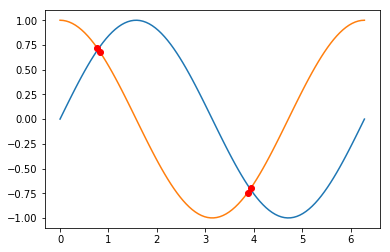

In [4]:
Nb=np.linspace(0,2*np.pi,100)
print(Nb,'\n')
S=Nb[9::10]
#print(S,'\n')

R=Nb[::-1]
#print(R,'\n')

mask=(np.absolute(np.sin(Nb)-np.cos(Nb))<0.1)
print(mask,'\n')

Filt_Nb=Nb[mask]
print(Filt_Nb)
idx=np.where(np.absolute(np.sin(Nb)-np.cos(Nb))<0.1)


import matplotlib.pyplot as plt 

%matplotlib inline

ys =np.sin(Nb) # np.sin is a universal function
yc=np.cos(Nb)
ycs=np.cos(Nb[idx])
plt.plot(Nb, ys)
plt.plot(Nb, yc)
plt.plot(Nb[idx],ycs,'ro')


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
M=np.array([1,2, 3, 4, 5, 6, 7, 8, 9, 10])
Mul=np.outer(M,M)
print(Mul)
Tr=np.trace(Mul)
print(Tr)
D1=np.diag(Mul[::-1]) 
print(D1)
print(np.diag(Mul,-1))


[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
Route_Pos=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print(Route_Pos)
B=Route_Pos.reshape(1,10)
A=Route_Pos.reshape(10,1)
print(A)
Route=abs(B-A)
print(Route);
Km_Route=1.60934*Route
print(Km_Route)

[   0  198  303  736  871 1175 1475 1544 1913 2448]
[[   0]
 [ 198]
 [ 303]
 [ 736]
 [ 871]
 [1175]
 [1475]
 [1544]
 [1913]
 [2448]]
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[    0.        318.64932   487.63002  1184.47424  1401.73514  1890.9745
   2373.7765   2484.82096  3078.66742  3939.66432]
 [  318.64932     0.        168.9807    865.82492  1083.08582  1572.32518
   2055.12718  2166.17164  2760.0181   3621.015  ]
 [  487.63002   168.9807      0.        696.84422   914.10512  1403.34448
   1886.14648

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
from math import sqrt
def Prime(N):
    Mask=np.ones((N,), dtype=bool)
    
    Mask[0]=False
    Mask[1]=False
    for p in range(int(sqrt(N))):
        if (Mask[p]==True):
            for j in range(2*p,100,p):
                Mask[j]=False
    Prime_Nb=np.where(Mask)[0]
    return (Prime_Nb)
#print(Prime(100))
#print(Prime(10000))
#%timeit Prime(100)
#%timeit Prime(10000)

def  Prime_opt(N):
    Mask=np.ones((N,), dtype=bool)
    
    Mask[0]=False
    Mask[1]=False
    for p in range(int(sqrt(N))):
        if (Mask[p]==True):
            for j in range(p**2,100,p):
                Mask[j]=False
    Prime_Nb=np.where(Mask)[0]
    return (Prime_Nb)
%timeit Prime(100)
%timeit Prime_opt(100)


10000 loops, best of 3: 27.2 µs per loop
10000 loops, best of 3: 25.7 µs per loop


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

(1000L, 200L)
(1000L, 200L)
(200L,)


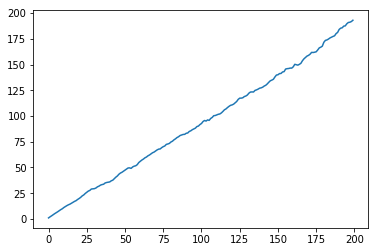

In [49]:
S=200
W=1000
Walking=np.random.randint(2, size=(W,S))
idx=np.where(Walking==0)
Walking[idx]=-1
#print(Walking)


Distance=np.zeros((W,S))
for i in range(W):
    Distance[i,0]=Walking[i,0]
    for j in range(1,S,1):
        
        Distance[i,j]=(np.sum(Walking[i,0:j+1]))
        
#print(Distance)
Dist_Sq=np.square(Distance)
Mean_Sq=np.mean(Dist_Sq,axis=0)
print(Distance.shape)
print(Dist_Sq.shape)
print(Mean_Sq.shape)
step=np.arange(S)
#print(step)

plt.plot(step,Mean_Sq)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

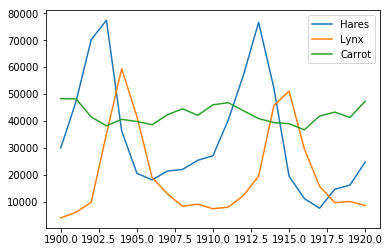

('Hares:', DescribeResult(nobs=21L, minmax=(7600.0, 77400.0), mean=34080.952380952382, variance=458558619.04761904, skewness=0.8707926603586706, kurtosis=-0.4713852285780282))
('Lynx:', DescribeResult(nobs=21L, minmax=(4000.0, 59400.0), mean=20166.666666666668, variance=277422333.33333331, skewness=1.122094055331874, kurtosis=-0.11206718692648243))
('Carrot:', DescribeResult(nobs=21L, minmax=(36700.0, 48300.0), mean=42400.0, variance=11591000.0, skewness=0.328696845915367, kurtosis=-0.9133000711768431))


In [50]:
Data=np.loadtxt('populations.txt')
Year=Data[:,0]
Hare=Data[:,1]
Lynx=Data[:,2]
Carrot=Data[:,3]
plt.plot(Year,Hare, label='Hares')
plt.plot(Year,Lynx, label='Lynx')
plt.plot(Year,Carrot, label='Carrot')
plt.legend()
plt.show()
from scipy import stats
print('Hares:', stats.describe(Hare))
print('Lynx:', stats.describe(Lynx))
print('Carrot:', stats.describe(Carrot))

